## Прогнозирование стоимости автомобиля по характеристикам

1. Попытка спарсить дополнительные данные с сайта auto.ru можно сказать, завершилась неудачно. Скачала все ссылки по брендам из списка, присутствующие в test, но наткнулась на большую проблему: не смогла получить сами данные в полном объеме. Каждый раз загрузка заканчивалась ошибкой, максимально удавалось получить 2000 объявлений за 6 часов. Чтобы получить 100000 понадобилась бы неделя в идеальных условиях, но загрузка постоянно прерывалась, думаю, из-за блокировок самого сайта. 
2. Тем не менее, даже те данные, что загрузила, попыталась применить дополнительно к датасету, который использован в baseline, но это привело к увеличеиню ошибки, как на валидационной выборке, так и на тестовой kaggle. Думаю, что это можно объяснить разнородностью выборки во времени (обучающей) и слишком большой разницей во времени с тестовой. Можно было попробовать различные коэффициенты для изменения цены, но времени было мало, сосредоточилась на подборе признаков и способа построения модели.

Блокнот с парсером:
my_parser_plus.ipynb

3. Выбраны наиболее значимые признаки (больше экспериментальным путем, каждый раз прогоняла решение через submit, поскольку достаточно большая разница между результатом ошибки на валидационной выборке и тестовой на kaggle).
И решение, выдающее наилучший результат на валидационной выборке совершенно не ведет себя аналогично при валидации на kaggle.
4. Наилучший результат, думаю, можно было бы получить, если скачать объявления с ID тестовой выборки и загнать их в обучающую (это ведь не запрещено?) мы бы получили прекрасный результат на kaggle (за счет переобучения) и гораздо более низкую оценку при валидации и тестировании на новых данных. Поэтому, по большому счету, все наши действия в данном соревновании - подгонка под ответ и слабые попытки оптимизировать модели, построеннные различными способами. Поэтому использование выборки baseline является более честным. 
## Что получилось и что не получилось.
*Получилось*: Достойный результат, как оказалось, можно достичь минимальными усилиями: достаточно лишь выбрать признаки, весомые при оценке автомобиля (даже эмпирически), привести их в порядок и подобрать гиперпараметры модели. 
при решении данной задачи наиболее значимыми все-таки являются правильно подобранные признаки и качество данных, подбор сособа моделирования и гиперпараметров по значимости сильно уступают.
Ипробовала и получила результаты по 4 ML моделям:
CatBoostRegressor
XGBRegressor 
ExtraTreesRegressor
GradientBoostingRegressor
Наилучший результат на валидационной выборке дал CatBoostRegressor, наилучший результат на kaggle  - GradientBoostingRegressor.

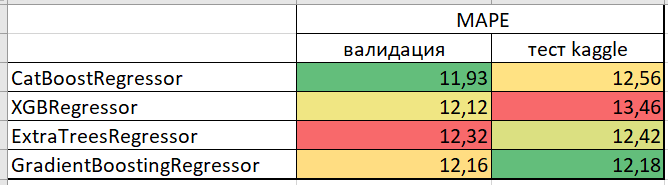

*Не получилось:*

    1. Качественно спарсить данные. В курсе недостаточно материалов, чтобы сделать это за несколько дней, отведенных на проект, а опыта и знаний нет.
    2. Не хватило времени на более полный и качественный EDA, увлеклась экспериментами с выбором библиотек для моедлирования, эксперимент с каждой и подбор пораметров требует большого количества времени, которого в рамках этого проекта просто нет.
    3. Не получилось сделать стеккинг нескольких моделей, fit идет очень долго, kaggle отрубает процесс. Думаю, это связано с использованием разреженной матрицы с больши (690) количеством признаков, однако на всех моделях, кроме catboost такой датасет дал лучший результат по сравнению с датасетом, признаки в котором просто кодируются.